## <font color = blue> Lead Score Case Study </font>

**- Aditi Jain And Abhishek Gupta**

#### Problem Statement
An Education company wishes to identify the most promising leads, i.e. the leads that are most likely to convert into paying customers.
Although company gets a lot of leads, its lead conversion rate is very poor.
We have leads dataset from the past with around 9000 data points. This consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc.The target variable is ‘Converted’ which tells whether a past lead was converted or not

### Step 1: Importing Data

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn import metrics

In [2]:
# Importing dataset

leads_data = pd.read_csv("Leads.csv")

### Step 2: Inspecting the Dataframe

In [3]:
# Let's see the head of our dataset
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe

print('Shape of the dataset: ', leads_data.shape)

Shape of the dataset:  (9240, 37)


In [5]:
# Let's look at the statistical aspects of the dataframe

leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column
print('Datatypes of all columns of our Data')

leads_data.info()

Datatypes of all columns of our Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per 

### Step 3 : Data Cleaning

#### Replace  'Select' with NaN

In [7]:
# Variables containing 'Select'
vars_containing_select = ['City', 'Lead Profile', 'How did you hear about X Education', 'Specialization']

# Select to be replaced with NaN as it denotes missing value.

leads_data[vars_containing_select]= leads_data[vars_containing_select].replace(to_replace = 'Select',  value = np.nan)

leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Drop Highly Imbalanced/Skewed Variables

In [8]:
print(leads_data['What matters most to you in choosing a course'].value_counts(dropna=False))

# Highly Imbalanced/Skewed Data, we can drop this.

leads_data.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


In [9]:
print(leads_data['Tags'].value_counts(dropna = False))

# Highly Imbalanced/Skewed Data, also contains null values, we can drop this.
leads_data.drop(['Tags'], 1, inplace = True)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [10]:
print(leads_data['Country'].value_counts(dropna = False, normalize = True))

# Highly Imbalanced/Skewed Data, also contains null values, we can drop this.
leads_data.drop(['Country'], 1, inplace = True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Kuwait                  0.000433
Canada                  0.000433
Nigeria                 0.000433
Germany                 0.000433
Sweden                  0.000325
Asia/Pacific Region     0.000216
Philippines             0.000216
Bangladesh              0.000216
China                   0.000216
Belgium                 0.000216
Ghana                   0.000216
Uganda                  0.000216
Italy                   0.000216
Netherlands             0.000216
Tanzania                0.000108
Kenya     

In [11]:
print(leads_data['What is your current occupation'].value_counts(dropna = False))

# Highly Imbalanced/Skewed Data, also contains null values, we can drop this.
leads_data.drop(['What is your current occupation'], 1, inplace = True)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


#### Imputing Missing Values
   

In [12]:
print(leads_data['City'].value_counts(dropna = False, normalize = True))

# We could club cities as 'Others' with low percentage category and null values

leads_data['City'] = leads_data['City'].replace(to_replace = [np.nan, "Other Metro Cities", "Tier II Cities",
                                                             "Other Cities of Maharashtra"],  value = 'Other Cities')

print("After CLubing\n", leads_data['City'].value_counts(dropna = False, normalize = True))

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64
After CLubing
 Other Cities         0.569913
Mumbai               0.348701
Thane & Outskirts    0.081385
Name: City, dtype: float64


In [13]:
print(leads_data['Specialization'].value_counts(dropna = False, normalize = True))

leads_data['Specialization'].replace(np.nan, 'Others', inplace = True)
print('After Replacement', leads_data['Specialization'].value_counts(dropna = False, normalize = True))

NaN                                  0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64
After Replacement Others                               0.365801
Finance Management       

In [14]:
print(leads_data['Last Activity'].value_counts(dropna = False, normalize = True))

# Its a sales generated column, hence dropping
leads_data.drop(['Last Activity'], 1, inplace = True)

Email Opened                    0.371970
SMS Sent                        0.297078
Olark Chat Conversation         0.105303
Page Visited on Website         0.069264
Converted to Lead               0.046320
Email Bounced                   0.035281
Email Link Clicked              0.028896
Form Submitted on Website       0.012554
NaN                             0.011147
Unreachable                     0.010065
Unsubscribed                    0.006602
Had a Phone Conversation        0.003247
Approached upfront              0.000974
View in browser link Clicked    0.000649
Email Marked Spam               0.000216
Email Received                  0.000216
Resubscribed to emails          0.000108
Visited Booth in Tradeshow      0.000108
Name: Last Activity, dtype: float64


#### Binary Variables Distribution

In [15]:
# List of binary variables

binary_vars =  ['Do Not Email', 'Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview',
            'Update me on Supply Chain Content']

for col in binary_vars:
    print('\n', leads_data[col].value_counts(dropna = False, normalize = True))



 No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

 No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

 No     0.998485
Yes    0.001515
Name: Search, dtype: float64

 No    1.0
Name: Magazine, dtype: float64

 No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

 No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

 No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

 No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

 No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

 No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

 No    1.0
Name: Get updates on DM Content, dtype: float64

 No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

 No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

 No    1.0
Name: Update me on Supply Chain Content, dtype: float64


##### As we can see from the value counts, there are varaibles where more than 95% ofvalues are No, we could drop these columns.


In [16]:
# Variables having more than 90% as 'No'. These are skewed and can be dropped

binary_vars_to_drop =  ['Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums',
            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
            'Get updates on DM Content','I agree to pay the amount through cheque',
            'Update me on Supply Chain Content']

for col in binary_vars_to_drop:
    leads_data.drop([col], 1, inplace = True)

#### Bucketing of  Skewed Categorical Variables

In [17]:
# Define a function that assign 'Others' to categories where value count is less than 20%

def bucketSkewed(col):
    valueCnt = leads_data[col].value_counts(dropna = False, normalize = True)
    print(valueCnt)

    skewed = leads_data[col].value_counts()[valueCnt < 0.05 ].index
    for i in skewed:
        leads_data[col] = np.where(leads_data[col] == i, 'Others', leads_data[col])
    
    print('\n After Bucketing: \n', leads_data[col].value_counts(dropna = False, normalize = True))
    
# Lead Origin is Skewed - Need Bucketing
bucketSkewed('Lead Origin')

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

 After Bucketing: 
 Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64


In [18]:
# Specialization is Skewed - Need Bucketing
bucketSkewed('Specialization')

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

 After Bucketing: 
 Others                       0.657468
Finance Management           0

In [19]:
# Specialization is Skewed - Need Bucketing
bucketSkewed('City')

Other Cities         0.569913
Mumbai               0.348701
Thane & Outskirts    0.081385
Name: City, dtype: float64

 After Bucketing: 
 Other Cities         0.569913
Mumbai               0.348701
Thane & Outskirts    0.081385
Name: City, dtype: float64


In [20]:
# Lead Source is Skewed - Need Bucketing
bucketSkewed('Lead Source')

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Live Chat            0.000216
Social Media         0.000216
Press_Release        0.000216
WeLearn              0.000108
testone              0.000108
welearnblog_Home     0.000108
blog                 0.000108
Pay per Click Ads    0.000108
NC_EDM               0.000108
youtubechannel       0.000108
Name: Lead Source, dtype: float64

 After Bucketing: 
 Google            0.310390
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Others            0.037879
NaN               0.003896
Name: Lead Source, dtype: float64


In [21]:
# Last Notable Activity is Skewed - Need Bucketing
bucketSkewed('Last Notable Activity')

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Email Received                  0.000108
View in browser link Clicked    0.000108
Resubscribed to emails          0.000108
Approached upfront              0.000108
Form Submitted on Website       0.000108
Name: Last Notable Activity, dtype: float64

 After Bucketing: 
 Modified        0.368723
Email Opened    0.305952
SMS Sent        0.235065
Others          0.090260
Name: Last Notable Activity, dtype: float64


#### Percentage of Missing Values

In [22]:
# Get Missing Values columns

null_percentage = leads_data[leads_data.columns[leads_data.isna().any()]].isna().mean().round(4) * 100
null_percentage.sort_values(ascending = False)

How did you hear about X Education    78.46
Lead Profile                          74.19
Lead Quality                          51.59
Asymmetrique Profile Score            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Index           45.65
Page Views Per Visit                   1.48
TotalVisits                            1.48
Lead Source                            0.39
dtype: float64

#### Drop Columns having more than 40% of null values

In [23]:
# Drop columns having more than 40% of null values

leads_data.drop(leads_data.columns[leads_data.isnull().sum()/leads_data.shape[0] > 0.4].tolist(), axis=1, inplace = True)

print('Shape of Data after dropping mising value columns' , leads_data.shape)

Shape of Data after dropping mising value columns (9240, 13)


#### Drop Rows having small % of missing values

In [24]:
# Remove TotalVisits Missing rows

leads_data = leads_data[~np.isnan(leads_data['TotalVisits'])]

In [25]:
# Remove Lead Source Missing rows

leads_data.dropna(subset=['Lead Source'], inplace = True)

In [26]:
# Checking percentage of missing values after dropping the missing value columns

null_percentage = leads_data[leads_data.columns[leads_data.isna().any()]].isna().mean().round(4) * 100
null_percentage.sort_values(ascending = False)

Series([], dtype: float64)

##### There are no null values left in our dataframe

In [27]:
# We could also drop Columns like unique Identifiers which are not needed for our analysis

leads_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [28]:
# Let's check shape of our dataframe

print('After Cleaning, shape of our data', leads_data.shape)
print('Left Columns', leads_data.columns)

After Cleaning, shape of our data (9074, 11)
Left Columns Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Specialization', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')


### Step 4: Data Preparation

### Converting binary variables (Yes/No) to 0/1

In [29]:
# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the binary variables

binary_vars =  ['Do Not Email', 'A free copy of Mastering The Interview']

leads_data[binary_vars] = leads_data[binary_vars].apply(binary_map)

### Shortening Column Labels

In [30]:
# Shortening Binary Variables Column Labels

shortenLabels = ['DNE', 'FreeCopy']

dic = {binary_vars[i]: shortenLabels[i] for i in range(len(binary_vars))} 
leads_data.rename(columns = dic, inplace = True)

binary_vars = shortenLabels

In [31]:
# Shortening Continuous Varibales Column labels

leads_data.rename(columns = {'Total Time Spent on Website': 'TimeSpent', 'Page Views Per Visit': 'PageViews' }, inplace = True)

# Get all the continuos variables
continuos_vars = ['TotalVisits', 'TimeSpent', 'PageViews']

In [32]:
# Lets check our dataframe now

print(leads_data.columns)
leads_data.head()

Index(['Lead Origin', 'Lead Source', 'DNE', 'Converted', 'TotalVisits',
       'TimeSpent', 'PageViews', 'Specialization', 'City', 'FreeCopy',
       'Last Notable Activity'],
      dtype='object')


,Lead Origin,Lead Source,DNE,Converted,TotalVisits,TimeSpent,PageViews,Specialization,City,FreeCopy,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Others,Other Cities,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Others,Other Cities,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Others,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Others,Mumbai,0,Modified


### Outlier Analysis And Treatment

In [33]:
# Checking for outliers in the continuous variables

leads_data_num = leads_data[continuos_vars]

In [34]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%

leads_data_num.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,TimeSpent,PageViews
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


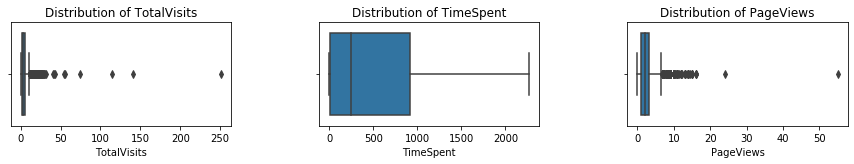

In [35]:
# Distribution of continuos variables

fig = plt.figure(figsize= (15,8))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for col in continuos_vars:
    ax = fig.add_subplot(3, 3, continuos_vars.index(col) + 1)
    plt.title("Distribution of " + col)
    sns.boxplot(leads_data[col])

plt.show() 

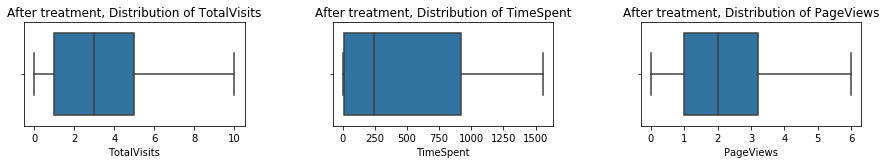

In [36]:
# Define a function to remove (statistical) outliers

def cap_upper_range(df, col):
    Q3 = df[col].quantile(0.95)
    df[col][df[col]>= Q3] = Q3
    return df

# Outlier Treatment
fig = plt.figure(figsize= (15,8))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for col in continuos_vars:
    ax = fig.add_subplot(3, 3, continuos_vars.index(col) + 1)
    leads_data = cap_upper_range(leads_data, col)
    sns.boxplot(leads_data[col])
    plt.title("After treatment, Distribution of " + col)
    
plt.show()

#### Visualizing distribution of variables based on Converted value

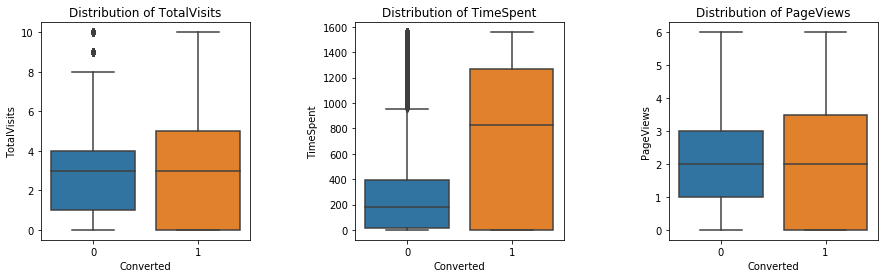

In [37]:
# Continuos Variables

fig = plt.figure(figsize= (15, 4))
fig.subplots_adjust(wspace=0.5)

for col in continuos_vars:
    ax = fig.add_subplot(1, 3, continuos_vars.index(col) + 1)
    plt.title("Distribution of " + col)
    sns.boxplot(y = col, x = 'Converted', data = leads_data)

plt.show()

**Inferences:**
- We could see the more Time Spent indicates more Lead Conversion.
- TotalVisits and PageViews Mean is same for both converted and not converted

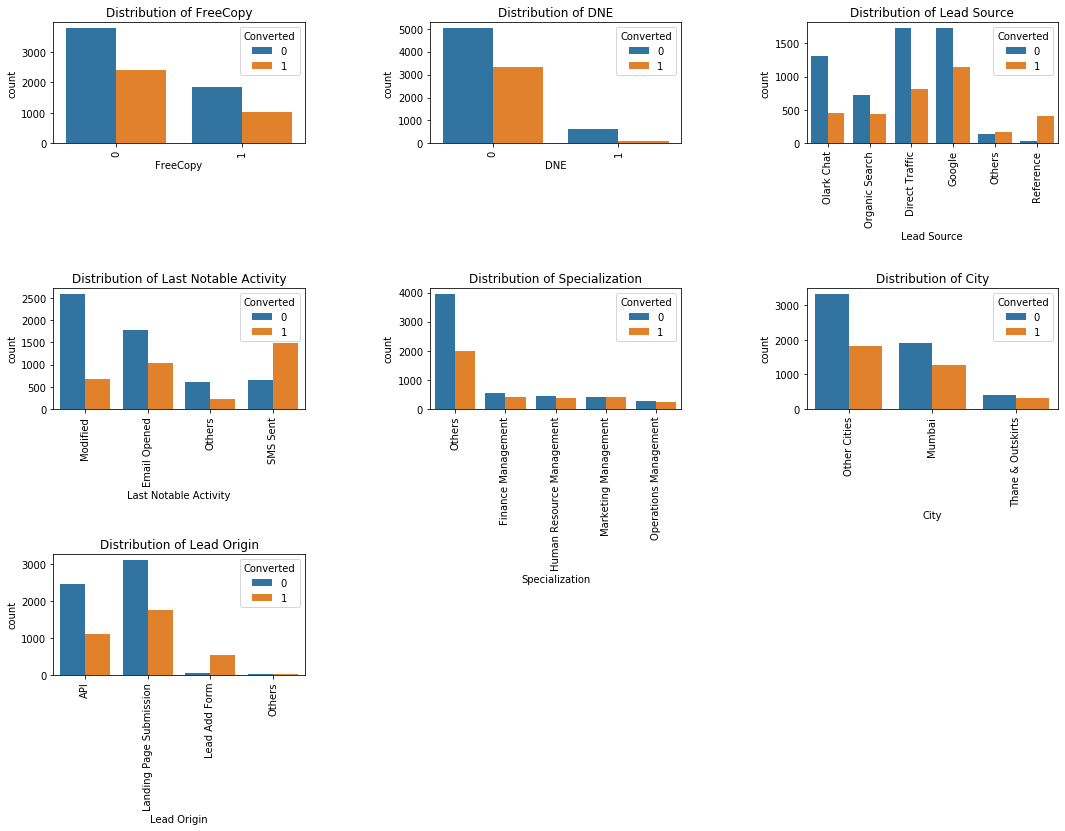

In [38]:

fig = plt.figure(figsize= (18,12))
fig.subplots_adjust(hspace=1.2, wspace=0.5)

cols = ['FreeCopy', 'DNE', 'Lead Source', 'Last Notable Activity', 'Specialization', 'City','Lead Origin']

for col in cols:
    ax = fig.add_subplot(3, 3, cols.index(col) + 1)
    plt.title("Distribution of " + col)
    sns.countplot(leads_data[col], hue = leads_data.Converted)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

plt.show()

**Inferences:**
- We could see from ‘Last Notable Activity’, Conversion Rate is higher for SMS Sent.
- ‘Lead Origin’ distribution indicates high Conversion rate for ‘Lead Add Form”
- ‘Lead Source’ distribution indicates high conversion rate for ‘Reference’ category.

### Dummification
- For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [39]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

categorical_vars = ['Lead Origin', 'Lead Source', 'Last Notable Activity', 'Specialization', 'City']

prefixes = ['Origin', 'City', 'Lst_Not_Act']
dummy = pd.get_dummies(leads_data[['Lead Origin', 'City', 'Last Notable Activity']], prefix = prefixes, drop_first = True)

# Adding the results to the master dataframe
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [40]:
dummy = pd.get_dummies(leads_data['Specialization'], prefix  = 'Spec')
dummy = dummy.drop(['Spec_Others'], 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [41]:
dummy = pd.get_dummies(leads_data['Lead Source'], prefix = 'Src')
dummy = dummy.drop(['Src_Others'], 1)
leads_data = pd.concat([leads_data, dummy], axis = 1)

In [42]:
# Dropping parent column
leads_data.drop(categorical_vars, 1, inplace = True)

In [43]:
print('Shape of the dataset after dummification: ', leads_data.shape)

Shape of the dataset after dummification:  (9074, 23)


In [44]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DNE                             9074 non-null   int64  
 1   Converted                       9074 non-null   int64  
 2   TotalVisits                     9074 non-null   float64
 3   TimeSpent                       9074 non-null   int64  
 4   PageViews                       9074 non-null   float64
 5   FreeCopy                        9074 non-null   int64  
 6   Origin_Landing Page Submission  9074 non-null   uint8  
 7   Origin_Lead Add Form            9074 non-null   uint8  
 8   Origin_Others                   9074 non-null   uint8  
 9   City_Other Cities               9074 non-null   uint8  
 10  City_Thane & Outskirts          9074 non-null   uint8  
 11  Lst_Not_Act_Modified            9074 non-null   uint8  
 12  Lst_Not_Act_Others              90

##### Now we have all variables as numeric.

### Step 5: Test-Train Split
Let's start by splitting our data into a training set and a test set.

In [45]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)

X.head()

,DNE,TotalVisits,TimeSpent,PageViews,FreeCopy,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Others,City_Other Cities,City_Thane & Outskirts,...,Lst_Not_Act_SMS Sent,Spec_Finance Management,Spec_Human Resource Management,Spec_Marketing Management,Spec_Operations Management,Src_Direct Traffic,Src_Google,Src_Olark Chat,Src_Organic Search,Src_Reference
0,0,0.0,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [46]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [47]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [48]:
# Applying Scaling to continuous Variables
print('Applying Scaling to Continuos vars: ', continuos_vars)

scaler = StandardScaler()
X_train[continuos_vars] = scaler.fit_transform(X_train[continuos_vars])
X_train.head()

Applying Scaling to Continuos vars:  ['TotalVisits', 'TimeSpent', 'PageViews']


,DNE,TotalVisits,TimeSpent,PageViews,FreeCopy,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Others,City_Other Cities,City_Thane & Outskirts,...,Lst_Not_Act_SMS Sent,Spec_Finance Management,Spec_Human Resource Management,Spec_Marketing Management,Spec_Operations Management,Src_Direct Traffic,Src_Google,Src_Olark Chat,Src_Organic Search,Src_Reference
3009,0,-0.432779,-0.150296,-0.155018,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1012,1,-0.432779,-0.543632,-0.155018,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9226,0,-1.150329,-0.904666,-1.265540,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4750,0,-0.432779,1.717578,-0.155018,0,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
7987,0,0.643547,2.053909,0.122613,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


#### Checking the Conversion Rate

Leads Conversion percentage:  37.85541106458012

 0    62.144589
1    37.855411
Name: Converted, dtype: float64


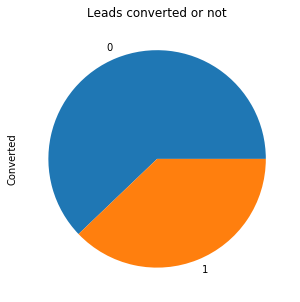

In [49]:
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
print('Leads Conversion percentage: ', converted)

# Checking the imbalace percentage
imbalance_per = 100*leads_data.Converted.value_counts(normalize = True)
print('\n', imbalance_per)

plt.figure(figsize=(5,5))
imbalance_per.plot(kind = 'pie', title ='Leads converted or not')
plt.show()

##### We have  currently ~38% conversion rate

### Step 6: Model Building

#### Running Your First Training Model

In [50]:
# Logistic regression model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2802.5
Date:                Sun, 25 Oct 2020   Deviance:                       5604.9
Time:                        21:42:21   Pearson chi2:                 6.57e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9924      0.296     -3.356      0.001      -1.572      -0.413
DNE                               -1.2832      0.171     -7.487      0.000      -1.619      -0.947
TotalVisits                        0.2931      0.053      5.552      0.000       0.190       0.397
TimeSpent                          1.1535      0.039     29.202      0.000       1.076       1.231
PageViews                         -0.2143      0.060     -3.589      0.000      -0.331      -0.097
FreeCopy                          -0.0510      0.104     -0.491      0.624      -0.255       0.153
Origin_Landing Page Submission    -0.3442      0.114     -3.008      0.003      -0.569      -0.120
Origin_Lead Add Form               5.4327      0.600      9.058      0.000       4.257       6.608
Origin_Others                      1.6858      0.525      3.209      0.001       0.656       2.716
City_Other Cities                 -0.2383      0.091     -2.624      0.009      -0.416      -0.060
City_Thane & Outskirts            -0.0547      0.130     -0.422      0.673      -0.309       0.199
Lst_Not_Act_Modified              -0.7286      0.085     -8.587      0.000      -0.895      -0.562
Lst_Not_Act_Others                -0.3328      0.130     -2.568      0.010      -0.587      -0.079
Lst_Not_Act_SMS Sent               1.4621      0.088     16.662      0.000       1.290       1.634
Spec_Finance Management            0.3504      0.118      2.981      0.003       0.120       0.581
Spec_Human Resource Management     0.3539      0.118      3.006      0.003       0.123       0.585
Spec_Marketing Management          0.5417      0.120      4.530      0.000       0.307       0.776
Spec_Operations Management         0.4349      0.151      2.882      0.004       0.139       0.731
Src_Direct Traffic                -0.0282      0.290     -0.097      0.923      -0.596       0.540
Src_Google                         0.2358      0.281      0.840      0.401      -0.315       0.786
Src_Olark Chat                     1.1666      0.301      3.878      0.000       0.577       1.756
Src_Organic Search                 0.1282      0.289      0.444      0.657      -0.438       0.694
Src_Reference                     -1.0345      0.567     -1.825      0.068      -2.146       0.077
==================================================================================================
"""

### Step 8: Feature Selection Using RFE

In [51]:
# Let's run RFE with 15 variables
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True, False,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False, False])

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
col = X_train.columns[rfe.support_]

print('Variables Selected by RFE:', col)

Variables Selected by RFE: Index(['DNE', 'TimeSpent', 'Origin_Landing Page Submission',
       'Origin_Lead Add Form', 'Origin_Others', 'City_Other Cities',
       'Lst_Not_Act_Modified', 'Lst_Not_Act_Others', 'Lst_Not_Act_SMS Sent',
       'Spec_Finance Management', 'Spec_Human Resource Management',
       'Spec_Marketing Management', 'Spec_Operations Management',
       'Src_Direct Traffic', 'Src_Olark Chat'],
      dtype='object')


In [53]:
print('Variables Dropped by RFE:', X_train.columns[~rfe.support_])

Variables Dropped by RFE: Index(['TotalVisits', 'PageViews', 'FreeCopy', 'City_Thane & Outskirts',
       'Src_Google', 'Src_Organic Search', 'Src_Reference'],
      dtype='object')


##### Assessing the model with StatsModels

In [54]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2820.7
Date:                Sun, 25 Oct 2020   Deviance:                       5641.5
Time:                        21:42:21   Pearson chi2:                 6.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.7233      0.114     -6.359      0.000      -0.946      -0.500
DNE                               -1.3146      0.169     -7.756      0.000      -1.647      -0.982
TimeSpent                          1.1584      0.039     29.492      0.000       1.081       1.235
Origin_Landing Page Submission    -0.3864      0.108     -3.590      0.000      -0.597      -0.175
Origin_Lead Add Form               4.3240      0.219     19.737      0.000       3.895       4.753
Origin_Others                      1.3830      0.444      3.118      0.002       0.514       2.252
City_Other Cities                 -0.2810      0.085     -3.313      0.001      -0.447      -0.115
Lst_Not_Act_Modified              -0.7528      0.084     -8.945      0.000      -0.918      -0.588
Lst_Not_Act_Others                -0.2101      0.126     -1.662      0.096      -0.458       0.038
Lst_Not_Act_SMS Sent               1.4306      0.087     16.433      0.000       1.260       1.601
Spec_Finance Management            0.3533      0.117      3.019      0.003       0.124       0.583
Spec_Human Resource Management     0.3444      0.117      2.934      0.003       0.114       0.574
Spec_Marketing Management          0.5294      0.119      4.448      0.000       0.296       0.763
Spec_Operations Management         0.4354      0.150      2.904      0.004       0.142       0.729
Src_Direct Traffic                -0.2646      0.086     -3.066      0.002      -0.434      -0.095
Src_Olark Chat                     0.8941      0.115      7.779      0.000       0.669       1.119
==================================================================================================
"""

In [55]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.232335
1012    0.028504
9226    0.128874
4750    0.908408
7987    0.580393
1281    0.857198
2880    0.111387
4971    0.953005
7536    0.732027
1248    0.547932
dtype: float64

In [56]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.23233482, 0.02850374, 0.12887436, 0.90840773, 0.58039346,
       0.85719809, 0.11138731, 0.95300515, 0.7320267 , 0.54793173])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [57]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.232335,3009
1,0,0.028504,1012
2,0,0.128874,9226
3,1,0.908408,4750
4,1,0.580393,7987


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [58]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.232335,3009,0
1,0,0.028504,1012,0
2,0,0.128874,9226,0
3,1,0.908408,4750,1
4,1,0.580393,7987,1


In [59]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3406  499]
 [ 769 1677]]


In [60]:
# Predicted     not_converted  converted
# Actual
# not_converted     3559           394
# converted         846            1573 

In [61]:
# Let's check the overall accuracy.
print("Accuracy of our Model: ", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy of our Model:  0.8003464021413951


#### Checking VIFs

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Origin_Landing Page Submission,3.32
5,City_Other Cities,2.24
6,Lst_Not_Act_Modified,1.94
13,Src_Direct Traffic,1.92
14,Src_Olark Chat,1.83
8,Lst_Not_Act_SMS Sent,1.71
3,Origin_Lead Add Form,1.32
1,TimeSpent,1.31
7,Lst_Not_Act_Others,1.28
9,Spec_Finance Management,1.27


'Origin_Others'high VIF value. Lets drop it

In [63]:
col = col.drop('Origin_Landing Page Submission', 1)
col

Index(['DNE', 'TimeSpent', 'Origin_Lead Add Form', 'Origin_Others',
       'City_Other Cities', 'Lst_Not_Act_Modified', 'Lst_Not_Act_Others',
       'Lst_Not_Act_SMS Sent', 'Spec_Finance Management',
       'Spec_Human Resource Management', 'Spec_Marketing Management',
       'Spec_Operations Management', 'Src_Direct Traffic', 'Src_Olark Chat'],
      dtype='object')

In [64]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2827.2
Date:                Sun, 25 Oct 2020   Deviance:                       5654.4
Time:                        21:42:22   Pearson chi2:                 6.61e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.9935      0.086    -11.587      0.000      -1.162      -0.825
DNE                               -1.3455      0.168     -7.990      0.000      -1.676      -1.015
TimeSpent                          1.1603      0.039     29.577      0.000       1.083       1.237
Origin_Lead Add Form               4.5185      0.212     21.264      0.000       4.102       4.935
Origin_Others                      1.6146      0.438      3.683      0.000       0.755       2.474
City_Other Cities                 -0.1534      0.077     -2.002      0.045      -0.304      -0.003
Lst_Not_Act_Modified              -0.7407      0.084     -8.823      0.000      -0.905      -0.576
Lst_Not_Act_Others                -0.2030      0.126     -1.607      0.108      -0.451       0.045
Lst_Not_Act_SMS Sent               1.4159      0.087     16.310      0.000       1.246       1.586
Spec_Finance Management            0.2904      0.116      2.514      0.012       0.064       0.517
Spec_Human Resource Management     0.2859      0.116      2.469      0.014       0.059       0.513
Spec_Marketing Management          0.4853      0.118      4.119      0.000       0.254       0.716
Spec_Operations Management         0.3598      0.148      2.433      0.015       0.070       0.650
Src_Direct Traffic                -0.3781      0.080     -4.714      0.000      -0.535      -0.221
Src_Olark Chat                     1.0513      0.107      9.818      0.000       0.841       1.261
==================================================================================================
"""

In [65]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [66]:
y_train_pred[:10]

array([0.22173648, 0.02789836, 0.13170801, 0.91444639, 0.60059208,
       0.86207465, 0.13041007, 0.93867999, 0.73332021, 0.56847852])

In [67]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [68]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,Predicted
0,0,0.221736,3009,0,0
1,0,0.027898,1012,0,0
2,0,0.131708,9226,0,0
3,1,0.914446,4750,1,1
4,1,0.600592,7987,1,1


In [69]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8003464021413951


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [70]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,City_Other Cities,2.24
13,Src_Olark Chat,1.77
5,Lst_Not_Act_Modified,1.74
7,Lst_Not_Act_SMS Sent,1.53
12,Src_Direct Traffic,1.44
1,TimeSpent,1.31
2,Origin_Lead Add Form,1.26
6,Lst_Not_Act_Others,1.24
0,DNE,1.18
8,Spec_Finance Management,1.14


Lst_Not_Act_Others has p-value. Lets drop it

In [71]:
col = col.drop('Lst_Not_Act_Others', 1)
col

Index(['DNE', 'TimeSpent', 'Origin_Lead Add Form', 'Origin_Others',
       'City_Other Cities', 'Lst_Not_Act_Modified', 'Lst_Not_Act_SMS Sent',
       'Spec_Finance Management', 'Spec_Human Resource Management',
       'Spec_Marketing Management', 'Spec_Operations Management',
       'Src_Direct Traffic', 'Src_Olark Chat'],
      dtype='object')

In [72]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2828.5
Date:                Sun, 25 Oct 2020   Deviance:                       5657.0
Time:                        21:42:22   Pearson chi2:                 6.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.0326      0.082    -12.529      0.000      -1.194      -0.871
DNE                               -1.3881      0.166     -8.353      0.000      -1.714      -1.062
TimeSpent                          1.1589      0.039     29.558      0.000       1.082       1.236
Origin_Lead Add Form               4.5227      0.212     21.288      0.000       4.106       4.939
Origin_Others                      1.6418      0.438      3.750      0.000       0.784       2.500
City_Other Cities                 -0.1554      0.077     -2.029      0.042      -0.305      -0.005
Lst_Not_Act_Modified              -0.6971      0.080     -8.760      0.000      -0.853      -0.541
Lst_Not_Act_SMS Sent               1.4592      0.083     17.642      0.000       1.297       1.621
Spec_Finance Management            0.2911      0.116      2.518      0.012       0.065       0.518
Spec_Human Resource Management     0.2886      0.116      2.493      0.013       0.062       0.516
Spec_Marketing Management          0.4893      0.118      4.155      0.000       0.258       0.720
Spec_Operations Management         0.3658      0.148      2.474      0.013       0.076       0.656
Src_Direct Traffic                -0.3772      0.080     -4.704      0.000      -0.534      -0.220
Src_Olark Chat                     1.0409      0.107      9.740      0.000       0.831       1.250
==================================================================================================
"""

In [73]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [74]:
y_train_pred[:10]

array([0.2153662 , 0.03143563, 0.13095296, 0.91481277, 0.60087423,
       0.86250022, 0.12603896, 0.93876543, 0.72521473, 0.56880623])

In [75]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [76]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,Predicted
0,0,0.215366,3009,0,0
1,0,0.031436,1012,0,0
2,0,0.130953,9226,0,0
3,1,0.914813,4750,1,1
4,1,0.600874,7987,1,1


In [77]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8003464021413951


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,City_Other Cities,2.13
12,Src_Olark Chat,1.74
5,Lst_Not_Act_Modified,1.61
6,Lst_Not_Act_SMS Sent,1.45
11,Src_Direct Traffic,1.42
1,TimeSpent,1.30
2,Origin_Lead Add Form,1.26
7,Spec_Finance Management,1.13
0,DNE,1.12
8,Spec_Human Resource Management,1.11


City_Other Cities has high VIF. So, Lets drop it

In [79]:
col = col.drop('City_Other Cities', 1)
col

Index(['DNE', 'TimeSpent', 'Origin_Lead Add Form', 'Origin_Others',
       'Lst_Not_Act_Modified', 'Lst_Not_Act_SMS Sent',
       'Spec_Finance Management', 'Spec_Human Resource Management',
       'Spec_Marketing Management', 'Spec_Operations Management',
       'Src_Direct Traffic', 'Src_Olark Chat'],
      dtype='object')

#### Final Model

In [80]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2830.6
Date:                Sun, 25 Oct 2020   Deviance:                       5661.1
Time:                        21:42:22   Pearson chi2:                 6.59e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1234      0.069    -16.177      0.000      -1.260      -0.987
DNE                               -1.3916      0.166     -8.367      0.000      -1.718      -1.066
TimeSpent                          1.1593      0.039     29.593      0.000       1.083       1.236
Origin_Lead Add Form               4.4890      0.212     21.222      0.000       4.074       4.904
Origin_Others                      1.6488      0.438      3.762      0.000       0.790       2.508
Lst_Not_Act_Modified              -0.7011      0.080     -8.818      0.000      -0.857      -0.545
Lst_Not_Act_SMS Sent               1.4561      0.083     17.612      0.000       1.294       1.618
Spec_Finance Management            0.3462      0.112      3.078      0.002       0.126       0.567
Spec_Human Resource Management     0.3325      0.114      2.920      0.004       0.109       0.556
Spec_Marketing Management          0.5282      0.116      4.547      0.000       0.301       0.756
Spec_Operations Management         0.3904      0.147      2.648      0.008       0.101       0.679
Src_Direct Traffic                -0.3633      0.080     -4.547      0.000      -0.520      -0.207
Src_Olark Chat                     0.9854      0.103      9.573      0.000       0.784       1.187
==================================================================================================
"""

In [81]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [82]:
y_train_pred[:10]

array([0.21169564, 0.02906809, 0.13148161, 0.9233539 , 0.63170863,
       0.85787977, 0.13977277, 0.9331898 , 0.70981062, 0.60045869])

In [83]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [84]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,Predicted
0,0,0.211696,3009,0,0
1,0,0.029068,1012,0,0
2,0,0.131482,9226,0,0
3,1,0.923354,4750,1,1
4,1,0.631709,7987,1,1


In [85]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8003464021413951


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lst_Not_Act_Modified,1.42
10,Src_Direct Traffic,1.40
11,Src_Olark Chat,1.37
5,Lst_Not_Act_SMS Sent,1.33
1,TimeSpent,1.30
2,Origin_Lead Add Form,1.20
0,DNE,1.12
6,Spec_Finance Management,1.12
7,Spec_Human Resource Management,1.11
8,Spec_Marketing Management,1.11


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [87]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3406,  499],
       [ 769, 1677]], dtype=int64)

In [88]:
# Actual/Predicted     not_churn    churn
        # not_churn        3269      366
        # churn            595       692  

In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8003464021413951

## Metrics beyond simply accuracy

In [90]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [91]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6856091578086672

#### Specificity

In [92]:
# Let us calculate specificity
TN / float(TN+FP)

0.8722151088348271

In [93]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12778489116517286


In [94]:
# positive predictive value 
print (TP / float(TP+FP))

0.7706801470588235


In [95]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8158083832335329


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()

    return None

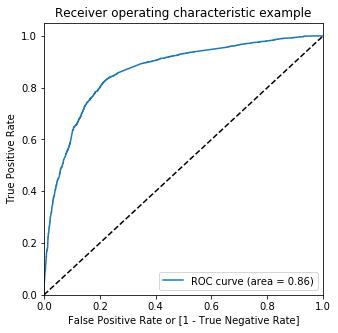

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### ROC Curve Area : 0.86

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [98]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.211696,3009,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.029068,1012,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0.131482,9226,0,0,1,1,0,0,0,0,0,0,0,0
3,1,0.923354,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.631709,7987,1,1,1,1,1,1,1,1,1,0,0,0


In [99]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.528421  0.974652  0.248912
0.2   0.2  0.722878  0.903925  0.609475
0.3   0.3  0.797040  0.833197  0.774392
0.4   0.4  0.803023  0.764105  0.827401
0.5   0.5  0.799087  0.682339  0.872215
0.6   0.6  0.779090  0.564595  0.913444
0.7   0.7  0.760668  0.468520  0.943662
0.8   0.8  0.736262  0.366721  0.967734
0.9   0.9  0.696426  0.236713  0.984379


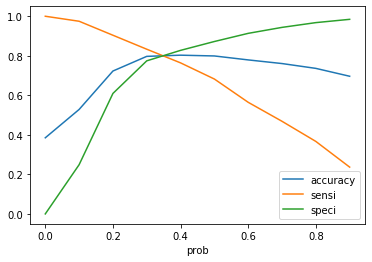

In [100]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [101]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0,0.211696,3009,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.029068,1012,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.131482,9226,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.923354,4750,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.631709,7987,1,1,1,1,1,1,1,1,1,0,0,0,1


#### Final Accuracy - Training Data

In [102]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8000314911037631

In [103]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion2

array([[3122,  783],
       [ 487, 1959]], dtype=int64)

In [104]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Final Sensitivity  - Training Data

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8008994276369583

#### Final Specificity  - Training Data

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.7994878361075545

In [107]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20051216389244558


In [108]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7144420131291028


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8650595732889997


## Precision and Recall

In [110]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3406,  499],
       [ 769, 1677]], dtype=int64)

##### Precision
TP / TP + FP

In [111]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7706801470588235

##### Recall
TP / TP + FN

In [112]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6856091578086672

In [113]:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
precision

0.7706801470588235

In [114]:
recall = recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
recall

0.6856091578086672

### Precision and recall tradeoff

In [115]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    1
 6349    0
 6350    1
 Name: predicted, Length: 6351, dtype: int64)

In [116]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

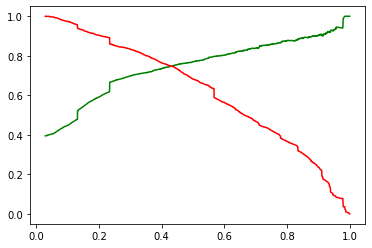

In [117]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### F1 Score

In [118]:
f1_score = 2*(recall * precision) / (recall + precision)
print('F1 Score: ' , f1_score)

F1 Score:  0.7256598874945909


### Step 11: Making predictions on the test set

In [119]:
print(continuos_vars)

X_test[continuos_vars] = scaler.fit_transform(X_test[continuos_vars])
X_test.head()

['TotalVisits', 'TimeSpent', 'PageViews']


,DNE,TotalVisits,TimeSpent,PageViews,FreeCopy,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Others,City_Other Cities,City_Thane & Outskirts,...,Lst_Not_Act_SMS Sent,Spec_Finance Management,Spec_Human Resource Management,Spec_Marketing Management,Spec_Operations Management,Src_Direct Traffic,Src_Google,Src_Olark Chat,Src_Organic Search,Src_Reference
3271,0,0.304501,-0.596974,0.998931,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1490,0,0.666261,1.983614,1.564920,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7936,0,-0.419021,-0.754931,-0.133048,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4216,0,-1.142542,-0.895759,-1.265027,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3830,0,1.751544,-0.583653,2.130909,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [120]:
X_test = X_test[col]
X_test.head()

,DNE,TimeSpent,Origin_Lead Add Form,Origin_Others,Lst_Not_Act_Modified,Lst_Not_Act_SMS Sent,Spec_Finance Management,Spec_Human Resource Management,Spec_Marketing Management,Spec_Operations Management,Src_Direct Traffic,Src_Olark Chat
3271,0,-0.596974,0,0,0,0,0,0,0,0,0,0
1490,0,1.983614,0,0,0,0,0,0,0,0,1,0
7936,0,-0.754931,0,0,0,0,0,0,0,0,0,0
4216,0,-0.895759,1,0,1,0,0,0,0,0,0,0
3830,0,-0.583653,0,0,0,0,0,0,0,0,0,0


In [121]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [122]:
y_test_pred = res.predict(X_test_sm)

In [123]:
y_test_pred[:10]

3271    0.139975
1490    0.692742
7936    0.119348
4216    0.835614
3830    0.141845
1800    0.167444
6507    0.477836
4821    0.337542
4223    0.977755
4714    0.132665
dtype: float64

In [124]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Let's see the head
y_pred_1.head()

,0
3271,0.139975
1490,0.692742
7936,0.119348
4216,0.835614
3830,0.141845


In [126]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [127]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [128]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.139975
1,1,1490,0.692742
2,0,7936,0.119348
3,1,4216,0.835614
4,0,3830,0.141845


In [131]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [132]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score
0,3271,0,0.139975,14
1,1490,1,0.692742,69
2,7936,0,0.119348,12
3,4216,1,0.835614,84
4,3830,0,0.141845,14


In [133]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [134]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Lead_Score,Final_Predicted
0,3271,0,0.139975,14,0
1,1490,1,0.692742,69,1
2,7936,0,0.119348,12,0
3,4216,1,0.835614,84,1
4,3830,0,0.141845,14,0


####  Accuracy - Test Data

In [135]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.7888358428204186

In [136]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion2

array([[1382,  352],
       [ 223,  766]], dtype=int64)

In [137]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

####  Sensitivity - Test Data

In [138]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7745197168857432

####  Specificity - Test Data

In [139]:
# Let us calculate specificity
TN / float(TN+FP)

0.7970011534025375

## Final Observations:
Let us compare the metrics for Train & Test:
 - Train Data: 
        Accuracy    : 80.03%
        Sensitivity : 80.08%
        Specificity : 79.94%
        
 - Test Data: 
        Accuracy    : 78.73%
        Sensitivity : 77.75%
        Specificity : 79.70%


The Model looks good and seems to predict the Conversion Rate very well which CEO confidence in making good calls based on this model